In [8]:
import os
import json
import pandas as pd
from tqdm import tqdm

# Ruta a los archivos JSON
folder_path = r"C:\Users\carda\Downloads\Data Science Henry DataFt25\PF Henry\data\Google Maps"

# Ruta para guardar los archivos procesados
processed_folder = r"C:\Users\carda\Downloads\Data Science Henry DataFt25\PF Henry\data\Google Maps\processed"

# Crear la carpeta para guardar archivos procesados si no existe
os.makedirs(processed_folder, exist_ok=True)

# Procesar los archivos JSON
files_to_process = os.listdir(folder_path)
for file_name in tqdm(files_to_process, desc="Procesando archivos JSON"):
    file_path = os.path.join(folder_path, file_name)
    processed_data = []  # Lista para almacenar datos procesados
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                try:
                    # Cargar cada línea como JSON
                    data = json.loads(line.strip())
                    processed_data.append(data)
                    if len(processed_data) >= 50:  # Solo tomar los primeros 50 registros
                        break
                except json.JSONDecodeError as e:
                    print(f"Error en línea del archivo {file_name}: {e}")
        
        # Si hay datos procesados, guardarlos en un archivo CSV
        if processed_data:
            df = pd.DataFrame(processed_data)
            output_path = os.path.join(processed_folder, f"processed_{file_name.replace('.json', '.csv')}")
            df.to_csv(output_path, index=False)
    except Exception as e:
        print(f"Error al procesar el archivo {file_name}: {e}")

print("Procesamiento completado y archivos CSV guardados.")


Procesando archivos JSON: 100%|█████████████| 623/623 [00:05<00:00, 113.29it/s]

Error al procesar el archivo processed: [Errno 13] Permission denied: 'C:\\Users\\carda\\Downloads\\Data Science Henry DataFt25\\PF Henry\\data\\Google Maps\\processed'
Procesamiento completado y archivos CSV guardados.


In [9]:
# Crear una lista para almacenar los DataFrames
dataframes = []

# Cargar todos los archivos procesados
processed_files = os.listdir(processed_folder)
for file_name in processed_files:
    if file_name.endswith(".csv"):
        file_path = os.path.join(processed_folder, file_name)
        try:
            df = pd.read_csv(file_path)
            dataframes.append(df)
        except Exception as e:
            print(f"Error al cargar {file_name}: {e}")

# Combinar todos los DataFrames en uno solo
if dataframes:
    combined_df = pd.concat(dataframes, ignore_index=True)
    print(f"Se han combinado {len(dataframes)} archivos. Total de filas: {len(combined_df)}")
else:
    print("No se encontraron archivos procesados para combinar.")


Se han combinado 622 archivos. Total de filas: 31100


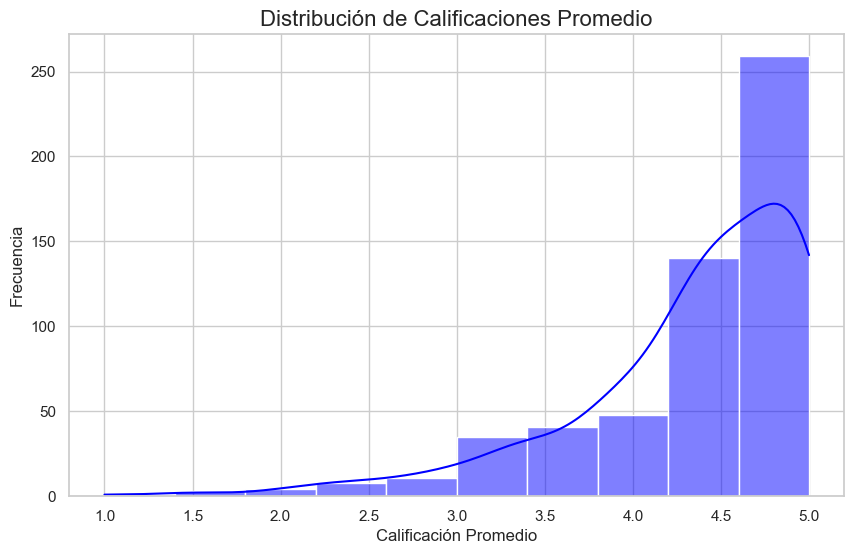

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo
sns.set(style="whitegrid")

# Histograma de calificaciones promedio
plt.figure(figsize=(10, 6))
sns.histplot(data=combined_df, x="avg_rating", bins=10, kde=True, color="blue")
plt.title("Distribución de Calificaciones Promedio", fontsize=16)
plt.xlabel("Calificación Promedio", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.show()


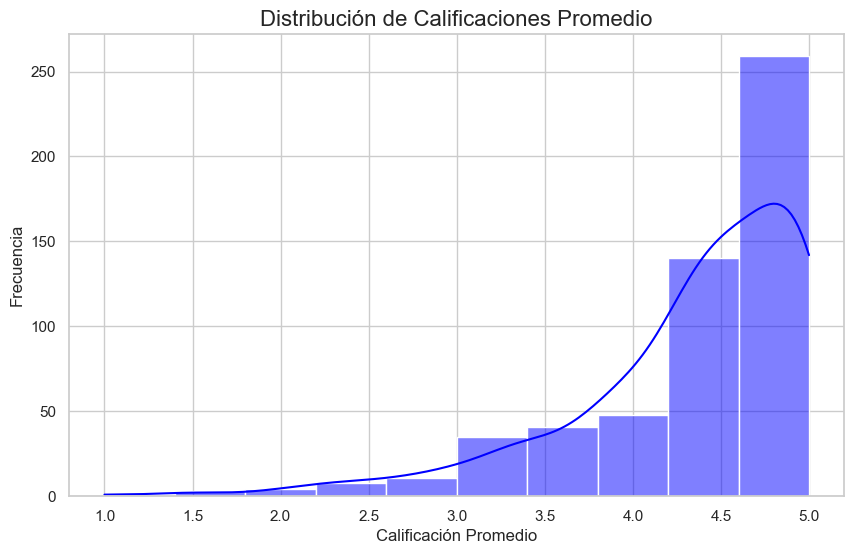

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo
sns.set(style="whitegrid")

# Histograma de calificaciones promedio
plt.figure(figsize=(10, 6))
sns.histplot(data=combined_df, x="avg_rating", bins=10, kde=True, color="blue")
plt.title("Distribución de Calificaciones Promedio", fontsize=16)
plt.xlabel("Calificación Promedio", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.show()


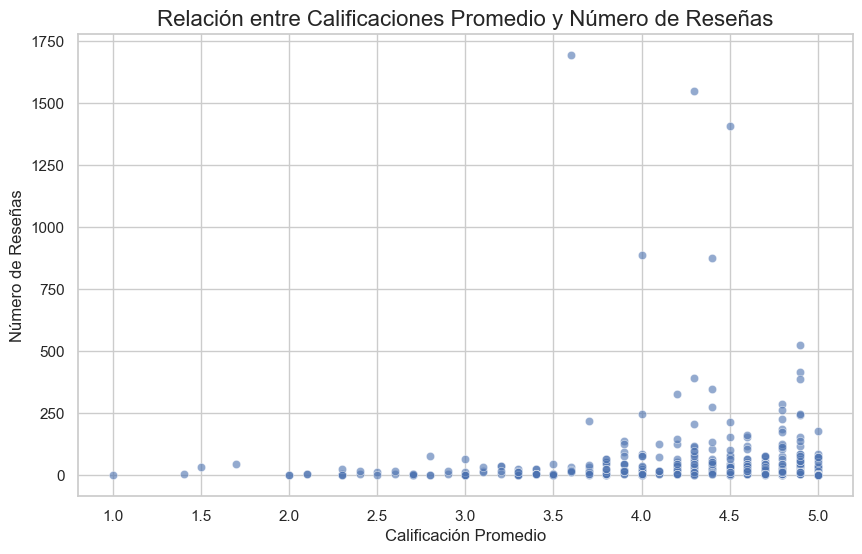

In [12]:
# Scatter plot para ver la relación entre calificación promedio y número de reseñas
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_df, x="avg_rating", y="num_of_reviews", alpha=0.6)
plt.title("Relación entre Calificaciones Promedio y Número de Reseñas", fontsize=16)
plt.xlabel("Calificación Promedio", fontsize=12)
plt.ylabel("Número de Reseñas", fontsize=12)
plt.show()


C:\Users\carda\AppData\Local\Temp\ipykernel_41992\3307626856.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hours_count.values, y=hours_count.index, palette="coolwarm")


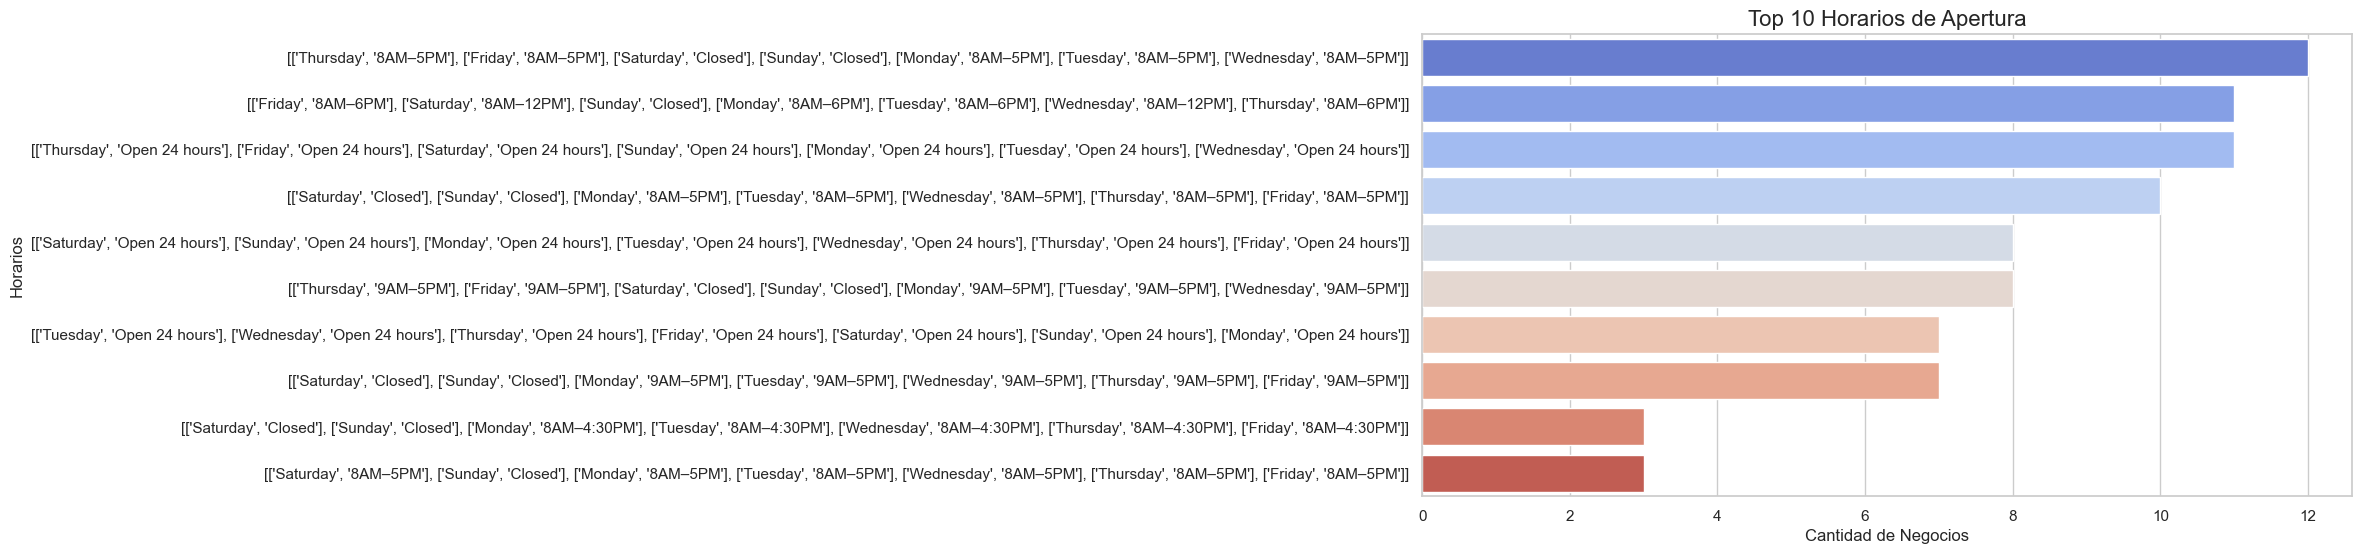

In [13]:
# Procesar los horarios y contarlos
hours_count = combined_df["hours"].value_counts().head(10)

# Gráfico de barras horizontales
plt.figure(figsize=(12, 6))
sns.barplot(x=hours_count.values, y=hours_count.index, palette="coolwarm")
plt.title("Top 10 Horarios de Apertura", fontsize=16)
plt.xlabel("Cantidad de Negocios", fontsize=12)
plt.ylabel("Horarios", fontsize=12)
plt.show()


In [14]:
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Agrupar negocios por estado
state_counts = combined_df["state"].value_counts()

# Descargar datos geográficos de estados de EE.UU.
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
us_states = world[world["iso_a3"] == "USA"]

# Unir los datos de conteo con los estados
state_counts = pd.DataFrame(state_counts).reset_index()
state_counts.columns = ["state", "count"]

# Mapa de calor
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

us_states.plot(ax=ax, color="lightgrey")
state_counts.plot(ax=ax, column="count", cmap="OrRd", legend=True, cax=cax)
plt.title("Distribución de Negocios por Estado", fontsize=16)
plt.show()


ModuleNotFoundError: No module named 'geopandas'

C:\Users\carda\AppData\Local\Temp\ipykernel_41992\1076973544.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_by_category.values, y=avg_rating_by_category.index, palette="magma")


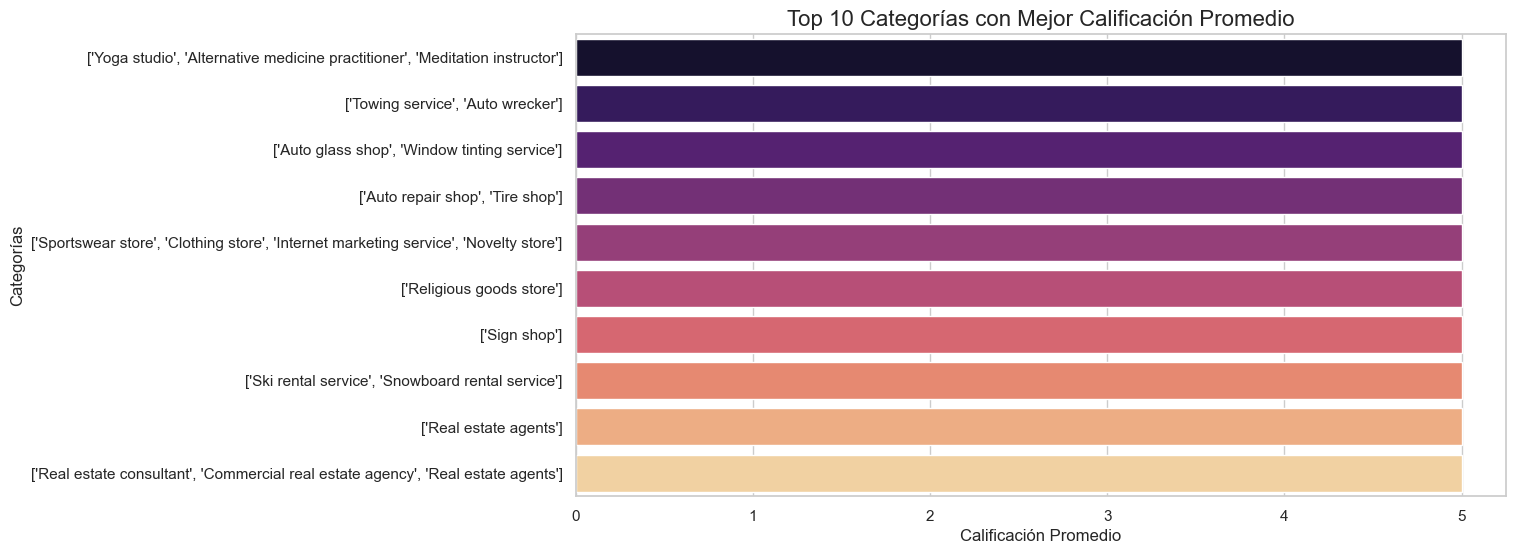

In [15]:
# Calcular promedio de calificaciones por categoría
avg_rating_by_category = combined_df.groupby("category")["avg_rating"].mean().sort_values(ascending=False).head(10)

# Gráfico de barras horizontales
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_rating_by_category.values, y=avg_rating_by_category.index, palette="magma")
plt.title("Top 10 Categorías con Mejor Calificación Promedio", fontsize=16)
plt.xlabel("Calificación Promedio", fontsize=12)
plt.ylabel("Categorías", fontsize=12)
plt.show()
